In [1]:
import numpy as np

import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve

'''test'''

In [2]:
x_hours =  np.array([0.50,0.75,1.00,1.25,1.50,
                     1.75,1.75,2.00,2.25,2.50,
                     2.75,3.00,3.25,3.50,4.00,
                     4.25,4.50,4.75,5.00,5.50]).reshape(-1,1)

In [3]:
y_pass = np.array([0,0,0,0,0,
                   0,1,0,1,0,
                   1,0,1,0,1,
                   1,1,1,1,1])

In [4]:
model_fit = LogisticRegression(C=10000).fit(x_hours,y_pass)

In [5]:
print(model_fit.intercept_,model_fit.coef_)

[-4.07756199] [[1.50458575]]


In [6]:
y_predict = model_fit.predict_proba(x_hours)[:,1]

In [7]:
x_range = np.linspace(min(x_hours),max(x_hours),100)
y_range = model_fit.predict_proba(x_range)[:,1]

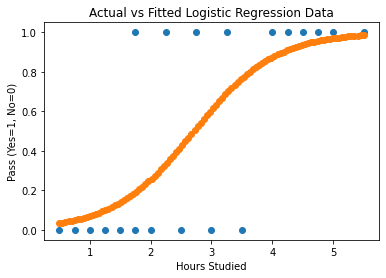

In [8]:
plt.scatter(x_hours,y_pass)
plt.scatter(x_range,y_range)
plt.title('Actual vs Fitted Logistic Regression Data')
plt.xlabel('Hours Studied')
plt.ylabel('Pass (Yes=1, No=0)')
plt.show()

In [22]:
logit_roc_auc = roc_auc_score(y_pass, y_predict)
auc_str = "AUC " + str(logit_roc_auc)

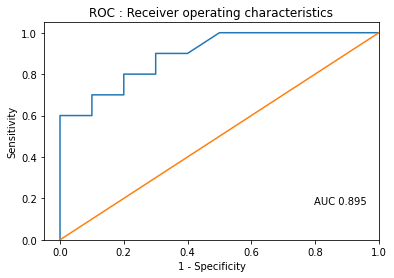

In [24]:
fpr, tpr, thresholds = roc_curve(y_pass, y_predict)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC : Receiver operating characteristics')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.figtext(.75, .25, auc_str)
plt.show()